# AVALIAÇÃO DE IMAGENS INDIVIDUALMENTE - CARREGAMENTO E APLICAÇÃO DA REDE NEURAL COVOLUCIONAL

### Bibliotecas a serem utilizadas

In [ ]:
import cv2
import numpy as np
from keras.models import load_model
from google.colab.patches import cv2_imshow

### Acessando arquivos no Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Recarregamento da Rede Neural Covolucional já treinada anteriormente

In [ ]:
model_loaded = load_model('/content/drive/MyDrive/DEEP_LEARNING_RNC_VC/weights/PESOS_RNC_5.hdf5')

In [ ]:
model_loaded.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

## Analisando imagem tipo FEMALE

In [ ]:
img = cv2.imread('/content/drive/MyDrive/DEEP_LEARNING_RNC_VC/Img_Male_Female_Test/Female/0 (702).jpg')

In [ ]:
print('Altura da imagem: ', img.shape[0])
print('Largura da imagem: ', img.shape[1])
print('Canais da imagem (RGB): ', img.shape[2])

Altura da imagem:  1112
Largura da imagem:  801
Canais da imagem (RGB):  3


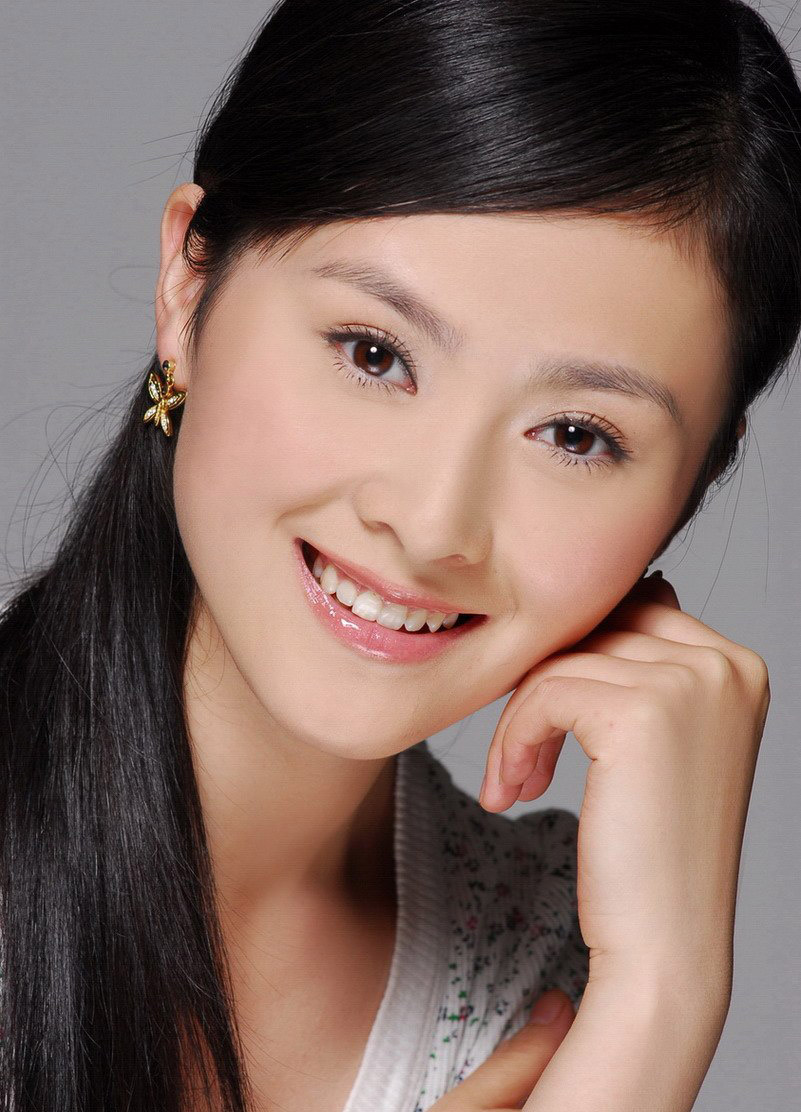

In [ ]:
cv2_imshow(img)

In [ ]:
# Pixels da imagem
img

array([[[151, 146, 148],
        [150, 145, 147],
        [150, 145, 147],
        ...,
        [151, 146, 148],
        [124, 119, 121],
        [145, 139, 144]],

       [[147, 142, 144],
        [147, 142, 144],
        [147, 142, 144],
        ...,
        [134, 129, 131],
        [132, 127, 129],
        [154, 148, 153]],

       [[153, 148, 150],
        [153, 148, 150],
        [153, 148, 150],
        ...,
        [140, 135, 137],
        [149, 144, 146],
        [147, 141, 146]],

       ...,

       [[ 10,   6,  17],
        [ 34,  30,  41],
        [ 24,  21,  30],
        ...,
        [153, 148, 150],
        [152, 147, 149],
        [158, 153, 155]],

       [[ 31,  27,  38],
        [ 24,  20,  31],
        [ 22,  19,  28],
        ...,
        [151, 146, 148],
        [151, 146, 148],
        [151, 146, 148]],

       [[ 38,  34,  45],
        [ 14,  10,  21],
        [ 30,  27,  36],
        ...,
        [150, 145, 147],
        [149, 144, 146],
        [151, 146, 148]]

In [ ]:
# Redimensionamemto da imagem
img = cv2.resize(img, (256, 256))

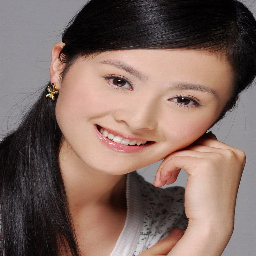

In [ ]:
cv2_imshow(img)

In [ ]:
# Normalizando os pixels
img = img/ 225
img

array([[[[0.67111111, 0.64888889, 0.65777778],
         [0.67111111, 0.64888889, 0.65777778],
         [0.67111111, 0.64888889, 0.65777778],
         ...,
         [0.64888889, 0.62666667, 0.63555556],
         [0.54666667, 0.52444444, 0.53333333],
         [0.63555556, 0.61333333, 0.62222222]],

        [[0.65777778, 0.63555556, 0.64444444],
         [0.64444444, 0.62222222, 0.63111111],
         [0.65777778, 0.63555556, 0.64444444],
         ...,
         [0.58666667, 0.56888889, 0.57777778],
         [0.57333333, 0.55111111, 0.56      ],
         [0.63111111, 0.60888889, 0.62222222]],

        [[0.65333333, 0.62666667, 0.63111111],
         [0.67111111, 0.64444444, 0.64888889],
         [0.67111111, 0.64888889, 0.64888889],
         ...,
         [0.53777778, 0.51555556, 0.52444444],
         [0.65777778, 0.63555556, 0.64444444],
         [0.65777778, 0.63555556, 0.64444444]],

        ...,

        [[0.15111111, 0.13333333, 0.18222222],
         [0.27111111, 0.25333333, 0.30222222]

In [ ]:
# Adaptando imagem para passar a rede neural covolucional
img = img.reshape(-1, 256, 256, 3)
img.shape

(1, 256, 256, 3)

### Previsão da RNC

In [ ]:
# Previsão
predict_f = model_loaded(img)
predict_f

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[1.7651052e-08, 1.0000000e+00]], dtype=float32)>

In [ ]:
# Dicionario com as clases
# Representação Matricial das variáveis atribuídas aos neurônios (Duble Variables)
# Male           [1 0]
# Female         [0 1]

Classes = {
    0: 'MALE',
    1: 'FEMALE'}

In [ ]:
predict_f2 = np.argmax(predict_f)
predict_f2

1

### Resultado

In [ ]:
print('RESULTADO DA RNC: ', Classes[predict_f2])

RESULTADO DA RNC:  FEMALE


### Probabilidade da imagem pertencer a classe a qual foi atribuída

In [ ]:
print('PROBABILIDADE: ', predict_f[0][predict_f2])

PROBABILIDADE:  tf.Tensor(1.0, shape=(), dtype=float32)


# Analisando imagem tipo MALE

In [ ]:
img_2 = cv2.imread('/content/drive/MyDrive/DEEP_LEARNING_RNC_VC/Img_Male_Female_Test/Male/1 (897).jpg')

In [ ]:
print('Altura da imagem: ', img_2.shape[0])
print('Largura da imagem: ', img_2.shape[1])
print('Canais da imagem (RGB): ', img_2.shape[2])

Altura da imagem:  1104
Largura da imagem:  736
Canais da imagem (RGB):  3


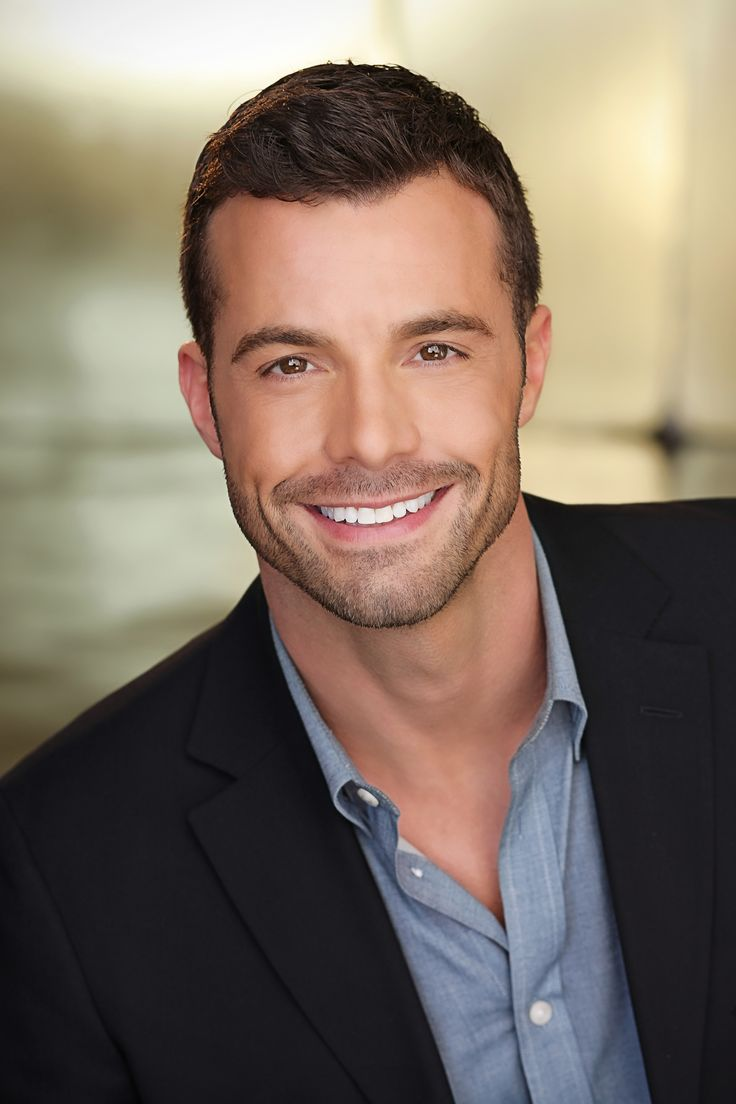

In [ ]:
cv2_imshow(img_2)

In [ ]:
# Pixels da imagem
img_2

array([[[198, 211, 213],
        [199, 212, 214],
        [199, 212, 214],
        ...,
        [161, 192, 201],
        [161, 192, 201],
        [160, 191, 200]],

       [[199, 212, 214],
        [199, 212, 214],
        [199, 212, 214],
        ...,
        [161, 192, 201],
        [161, 192, 201],
        [160, 191, 200]],

       [[199, 212, 214],
        [199, 212, 214],
        [199, 212, 214],
        ...,
        [161, 192, 201],
        [161, 192, 201],
        [160, 191, 200]],

       ...,

       [[ 12,  10,  10],
        [ 12,  10,  10],
        [ 13,  11,  11],
        ...,
        [ 25,  20,  21],
        [ 25,  20,  21],
        [ 25,  20,  21]],

       [[ 12,  10,  10],
        [ 12,  10,  10],
        [ 13,  11,  11],
        ...,
        [ 25,  20,  21],
        [ 25,  20,  21],
        [ 25,  20,  21]],

       [[ 12,  10,  10],
        [ 12,  10,  10],
        [ 13,  11,  11],
        ...,
        [ 25,  20,  21],
        [ 25,  20,  21],
        [ 25,  20,  21]]

In [ ]:
# Redimensionamento da imagem
img_2 = cv2.resize(img_2, (256, 256))

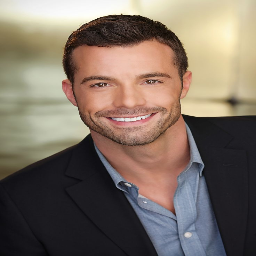

In [ ]:
cv2_imshow(img_2)

In [ ]:
# Normalização dos Pixels da imagem
img_2 = img_2/ 225
img_2

array([[[0.88444444, 0.94222222, 0.95111111],
        [0.89333333, 0.94666667, 0.95555556],
        [0.89333333, 0.95111111, 0.96      ],
        ...,
        [0.73333333, 0.87111111, 0.91111111],
        [0.72444444, 0.86222222, 0.90222222],
        [0.71555556, 0.85333333, 0.89333333]],

       [[0.88888889, 0.94666667, 0.95555556],
        [0.89777778, 0.95555556, 0.96444444],
        [0.90222222, 0.96      , 0.96888889],
        ...,
        [0.73333333, 0.87111111, 0.91111111],
        [0.72444444, 0.86222222, 0.90222222],
        [0.71555556, 0.85333333, 0.89333333]],

       [[0.89333333, 0.95111111, 0.96      ],
        [0.89777778, 0.95555556, 0.96444444],
        [0.90222222, 0.96      , 0.96888889],
        ...,
        [0.72888889, 0.86666667, 0.90666667],
        [0.72      , 0.85777778, 0.89777778],
        [0.71111111, 0.84888889, 0.88888889]],

       ...,

       [[0.05777778, 0.04888889, 0.04888889],
        [0.06222222, 0.05333333, 0.05333333],
        [0.06666667, 0

In [ ]:
# Adaptando imagem para passar a rede neural covolucional
img_2 = img_2.reshape(-1, 256, 256, 3)
img_2.shape

(1, 256, 256, 3)

### Previsão da RNC

In [ ]:
# Previsão
predict_m = model_loaded(img_2)
predict_m

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[1.000000e+00, 5.101966e-10]], dtype=float32)>

In [ ]:
predict_m2 = np.argmax(predict_m)
predict_m2

0

### Resultado

In [ ]:
print('RESULTADO DA RNC: ', Classes[predict_m2])

RESULTADO DA RNC:  MALE


### Probabilidade da imagem pertencer a classe a qual foi atribuída

In [ ]:
print('PROBABILIDADE: ', predict_m[0][predict_m2])

PROBABILIDADE:  tf.Tensor(1.0, shape=(), dtype=float32)
